In [ ]:
# Captstone Final Project - Ariel Sorek
# Data was obtained from the following source: https://openpolicing.stanford.edu/data/

# For this analysis, the dataset used was traffic stop data within the city of Nasville, which was obtained from the 'The Stanford Open Policing Project'

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn')

tn = pd.read_csv('nashville.csv')

print(tn.head())

print(tn.isnull().sum())

C:\Users\ariel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


  raw_row_number        date      time  \
0         232947  2010-10-10       NaN   
1         237161  2010-10-10  10:00:00   
2         232902  2010-10-10  10:00:00   
3         233219  2010-10-10  22:00:00   
4         232780  2010-10-10  01:00:00   

                                            location        lat        lng  \
0  DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...  36.187925 -86.798519   
1            1122 LEBANON PIKE, NASHVILLE, TN, 37210  36.155521 -86.735902   
2                       898 DAVIDSON DR, , TN, 37205  36.117420 -86.895593   
3  MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...  36.086799 -86.648581   
4                      BUCHANAN ST, NORTH, TN, 37208  36.180038 -86.809109   

  precinct  reporting_area zone  subject_age  ... raw_traffic_citation_issued  \
0        6          4403.0  611         27.0  ...                       False   
1        5          9035.0  513         18.0  ...                        True   
2        1          5005.0  121    

In [221]:
# Examine shape of dataframe

print(tn.shape)

# Examine DataType

print(tn.dtypes)

(3092351, 42)
raw_row_number                     object
date                               object
time                               object
location                           object
lat                               float64
lng                               float64
precinct                           object
reporting_area                    float64
zone                               object
subject_age                       float64
subject_race                       object
subject_sex                        object
officer_id_hash                    object
type                               object
violation                          object
arrest_made                        object
citation_issued                    object
warning_issued                     object
outcome                            object
contraband_found                   object
contraband_drugs                   object
contraband_weapons                 object
frisk_performed                    object
search_conducted    

In [222]:
# Examine data type of arrest_made column

print(tn.arrest_made.head())

tn['arrest_made'] = tn.arrest_made.astype('bool')

print(tn.arrest_made.dtype)

0    False
1    False
2    False
3    False
4    False
Name: arrest_made, dtype: object
bool


In [223]:
tn.head(3)

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6,4403.0,611,27.0,...,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5,9035.0,513,18.0,...,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1,5005.0,121,52.0,...,False,NaN,N,False,False,False,False,False,False,False


In [224]:
# Combine 'date' and 'time' (seperated by a space)
combined = tn.date.str.cat(tn.time, sep = ' ')

# Convert 'combined' to datetime format
tn['stop_datetime'] = pd.to_datetime(combined)

# Examine the datatypes of dataframe
print(tn.dtypes)


raw_row_number                            object
date                                      object
time                                      object
location                                  object
lat                                      float64
lng                                      float64
precinct                                  object
reporting_area                           float64
zone                                      object
subject_age                              float64
subject_race                              object
subject_sex                               object
officer_id_hash                           object
type                                      object
violation                                 object
arrest_made                                 bool
citation_issued                           object
warning_issued                            object
outcome                                   object
contraband_found                          object
contraband_drugs    

In [225]:
# Set 'stop_datetime' as index
tn.set_index('stop_datetime', inplace = True)

# Examine the index
print(tn.index)


DatetimeIndex([                'NaT', '2010-10-10 10:00:00',
               '2010-10-10 10:00:00', '2010-10-10 22:00:00',
               '2010-10-10 01:00:00', '2010-10-10 01:00:00',
               '2010-10-10 22:02:00', '2010-10-10 10:04:00',
               '2010-10-10 10:05:00', '2010-10-10 10:05:00',
               ...
               '2016-09-09 09:54:00', '2016-09-09 09:54:00',
               '2016-09-09 09:54:00', '2016-09-09 09:54:00',
               '2016-09-09 09:54:00', '2016-09-09 21:54:00',
               '2016-09-09 21:55:00', '2016-09-09 09:56:00',
               '2016-09-09 09:56:00', '2016-09-09 21:57:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=3092351, freq=None)


# Hypothesis Q1: Do genders commit different violations?

In [226]:
print(tn['violation'].value_counts())
print(tn['violation'].value_counts(normalize = True))

moving traffic violation       1546865
vehicle equipment violation     996282
safety violation                186139
registration                    185756
seatbelt violation              103199
investigative stop               56489
parking violation                 8483
child restraint                   1118
Name: violation, dtype: int64
moving traffic violation       0.501524
vehicle equipment violation    0.323014
safety violation               0.060350
registration                   0.060226
seatbelt violation             0.033459
investigative stop             0.018315
parking violation              0.002750
child restraint                0.000362
Name: violation, dtype: float64


In [227]:
# Comparing violations by gender

# Create a dataframe of female drivers
female = tn[tn['subject_sex'] == 'female']

# Create a dataframe of male drivers
male = tn[tn['subject_sex'] == 'male']


# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True))



moving traffic violation       0.506626
vehicle equipment violation    0.326046
registration                   0.061622
safety violation               0.060160
seatbelt violation             0.027144
investigative stop             0.015427
parking violation              0.002395
child restraint                0.000580
Name: violation, dtype: float64
moving traffic violation       0.498219
vehicle equipment violation    0.321266
safety violation               0.060384
registration                   0.059238
seatbelt violation             0.037828
investigative stop             0.020240
parking violation              0.002610
child restraint                0.000214
Name: violation, dtype: float64


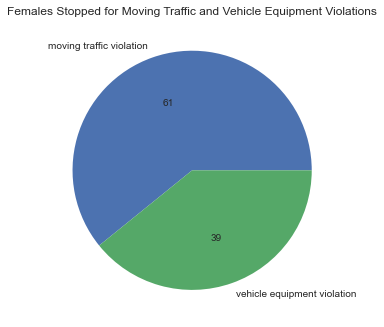

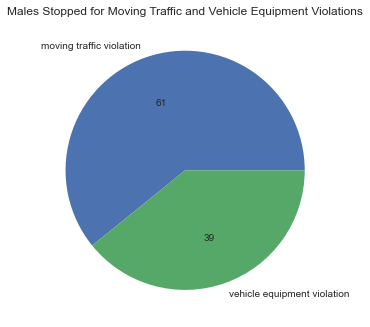

In [228]:
common_violations_list = ['moving traffic violation', 'vehicle equipment violation']

# 'moving traffic' and 'vehicle equipment' violation for female
common_violations_female = tn[tn['violation'].isin(common_violations_list)]

# 'moving traffic' and 'vehicle equipment' violation for male
common_violations_male = tn[tn['violation'].isin(common_violations_list)]


# Pie Chart for 'moving traffic' and 'vehicle equipment' violation for male and female
common_violations_female.violation.value_counts(normalize = True).plot(kind='pie', autopct='%.f')
plt.title('Females Stopped for Moving Traffic and Vehicle Equipment Violations')
plt.ylabel("")
plt.show()

common_violations_male.violation.value_counts(normalize = True).plot(kind='pie', autopct='%.f')
plt.title('Males Stopped for Moving Traffic and Vehicle Equipment Violations')
plt.ylabel("")
plt.show()



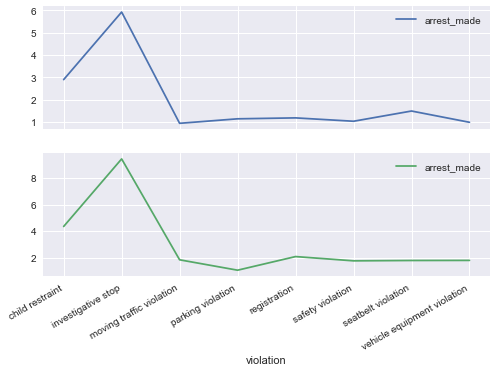

In [229]:
# Arrests made for Female and Male by  Violation

female_violation_arrested = female.groupby('violation')['arrest_made'].mean()*100
male_violation_arrested = male.groupby('violation')['arrest_made'].mean()*100

male_female_violation_arrested = pd.concat([female_violation_arrested, male_violation_arrested], axis = 'columns')
male_female_violation_arrested.plot(subplots = True)
plt.show()


# Conclusions for Hypothesis Q1
# - Males and Females are both commonly pulled over for 'Moving Traffic' and 'Vehicle Equipment' violations
# - For 'Moving Traffic' and 'Vehicle Equipment':
    # - Males and Female proportions are identical at 50% and 32%

# In conclusion, in Nashville, both Male and Female get stopped for the same traffic violations

# Hypthesis Q2: Does gender impact the Stop Outcome (e.g. Warning, Arrest or Citation)?
# Note: Citation is considered 'formal' for a ticket

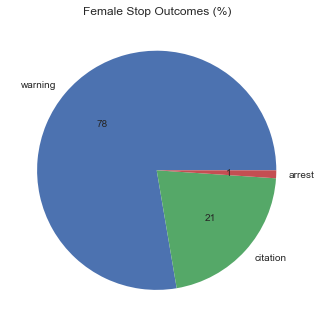

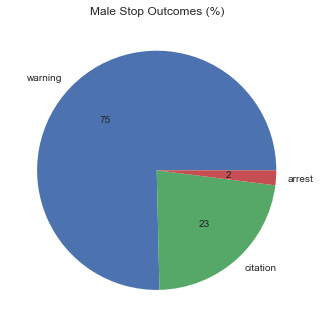

In [230]:
# Comparing 'Stop Outcome' by Gender


# Store Female Stop Outcomes (e.g. warning, citation, arrest) in variable called 'female_stop_outcome'
female_stop_outcome = female.outcome.value_counts(normalize = True).plot(kind = 'pie', ylabel = '', autopct='%.f', title = 'Female Stop Outcomes (%)')
plt.show()

# Store Male Stop Outcomes (e.g. warning, citation, arrest) in variable called 'female_stop_outcome'
male_stop_outcome = male.outcome.value_counts(normalize = True).plot(kind = 'pie', ylabel = '', autopct='%.f', title = 'Male Stop Outcomes (%)')
plt.show()



# Conclusions for Hypothesis Q2
# - The proporation of 'Warnings' and 'Citations' given to Male and Female are identical
# - 77% of male and female drivers respectively are stopped and given a warning
# - 21% of male and female drivers respectively are stopped and given a formal ticket ('citation')

In [231]:
print(tn.frisk_performed.dtype)

object


# Hypthesis Q3: Does Gender affect whose vehicle is searched?

In [232]:
# Convert 'search_conducted' from object to boolean
tn['search_conducted'] = tn.search_conducted.astype('bool')

# Check Datatype
print(tn.search_conducted.dtype)

bool


In [233]:
# Calculate the search rate
print(tn.search_conducted.value_counts(normalize = True))

False    0.95869
True     0.04131
Name: search_conducted, dtype: float64


In [234]:
# Calculate the search rate for each combination of gender and violation
print(tn.groupby(['subject_sex', 'violation']).search_conducted.mean()*100)

subject_sex  violation                  
female       child restraint                 3.034483
             investigative stop              9.431907
             moving traffic violation        1.970114
             parking violation               2.473262
             registration                    2.576824
             safety violation                2.333440
             seatbelt violation              3.190329
             vehicle equipment violation     2.482191
male         child restraint                 7.179487
             investigative stop             18.417699
             moving traffic violation        4.669247
             parking violation               4.771915
             registration                    5.527661
             safety violation                4.862001
             seatbelt violation              6.030406
             vehicle equipment violation     5.516202
Name: search_conducted, dtype: float64


# Key Takeaways from Hypthesis Q3
 # - Male drivers relative to Female Drivers are twice more likely on average to have their vehicle searched

# Hypthesis Q4: Does Gender affect who is frisked during a search?

In [235]:
tn.frisk_performed.value_counts()

False    3030561
True       61768
Name: frisk_performed, dtype: int64

In [236]:
# Convert 'search_conducted' from object to boolean
tn['search_conducted'] = tn.search_conducted.astype('bool')
print(tn.search_conducted.dtype)
print(tn.search_conducted.value_counts())

# Convert 'frisk_performed' from object to boolean
tn['frisk_performed'] = tn.frisk_performed.astype('bool')

# Convert 'contraband_drugs' from object to boolean
tn['contraband_drugs'] = tn.contraband_drugs.astype('bool')

# Convert 'contraband_weapons' from object to boolean
tn['contraband_weapons'] = tn.contraband_weapons.astype('bool')

bool
False    2964607
True      127744
Name: search_conducted, dtype: int64


0.4836939504008016
subject_sex
female    10801
male      50744
Name: frisk_performed, dtype: int64


<AxesSubplot:title={'center':'Frisk Rate (%) by Gender'}>

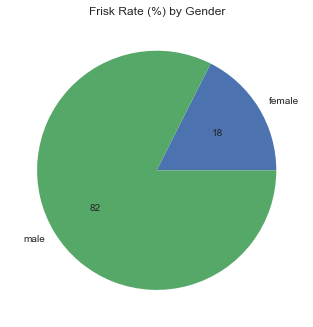

In [237]:
# Create a dataframe of stops where a search was conducted
searched = tn[tn.search_conducted == True]

# Calculate frisk rate by taking mean of 'frisk_performed'
print(searched.frisk_performed.mean())

# Calculate the frisk rate by gender
frisked_by_gender = searched.groupby('subject_sex')['frisk_performed'].sum()
print(frisked_by_gender)

frisked_by_gender.plot(kind='pie', ylabel = '', title = 'Frisk Rate (%) by Gender', autopct='%.f')


# Key Takeaways from Hypthesis Q4: 
 # - Male drivers are more likely to be frisked if their vehicle is searched

# Hypthesis Q5: Does the time of Day affect the arrest rate?

In [238]:
# Calculate overall arrest rate
print(tn.arrest_made.mean())

# Calculate hourly arrest rate
print(tn.groupby(tn.index.hour).arrest_made.mean()*100)

# Save into variable called 'hourly_arrest_rate'
hourly_arrest_rate = tn.groupby(tn.index.hour).arrest_made.mean()
percentage_hourly_arrest_rate = hourly_arrest_rate *100

0.016244598365450752
stop_datetime
0.0     2.427789
1.0     3.664297
2.0     4.485746
3.0     4.489705
4.0     3.649649
5.0     1.945287
6.0     2.249961
7.0     0.694755
8.0     0.669245
9.0     0.806385
10.0    0.880177
11.0    1.085449
12.0    0.984191
13.0    1.105200
14.0    1.476974
15.0    0.984274
16.0    1.129181
17.0    1.375338
18.0    1.453406
19.0    1.373473
20.0    1.529244
21.0    1.785868
22.0    2.211876
23.0    1.862210
Name: arrest_made, dtype: float64


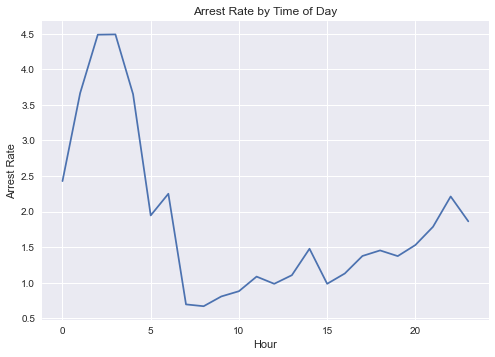

In [239]:
# Plot 'hourly_arrest_rate'

import matplotlib.pyplot as plt

# Create a plot of 'hourly_arrest_rate'
percentage_hourly_arrest_rate.plot()

# Add x-label, y-label and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

# Conclusions for Hypthesis Q5
- There is a significant spike in the arrest rate overnight, but a sharp decline in the early morning hours

# Hypthesis Q6 Are Drug Stoppages on the rise

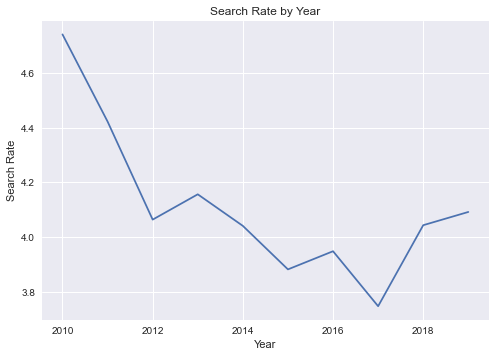

In [240]:
# Calculating 'annual_search_rate'
annual_search_rate = tn.groupby(tn.index.year).search_conducted.mean()*100

annual_search_rate.plot()
plt.xlabel('Year')
plt.ylabel('Search Rate')
plt.title('Search Rate by Year')
plt.show()

# From 2010 to 2017 there was a sharp decline in searchs, but began to increase from 2017

In [241]:
# Calculating annual rate for drugs and weapons found

annual_drugs_and_weapons_found_rate = tn.groupby(tn.index.year)[['contraband_drugs', 'contraband_weapons']].mean()*100

#Annual Drug and Search Rate Benchmark

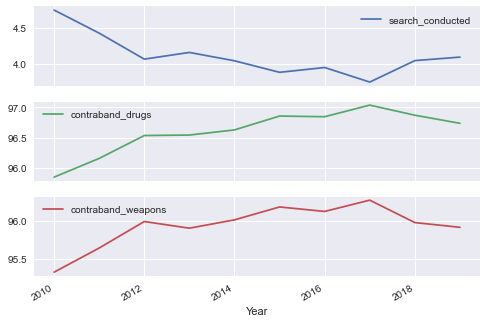

In [242]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_search_rate, annual_drugs_and_weapons_found_rate], axis = 'columns')

# Create subplots from 'annual'
annual.plot(subplots = True)
plt.xlabel('Year')
plt.show()

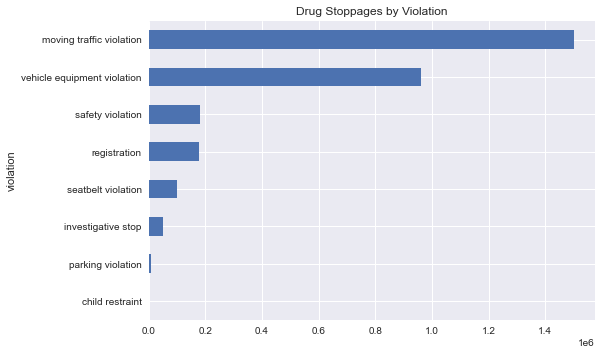

In [243]:
drug_stops = tn.groupby('violation')['contraband_drugs'].sum().sort_values(ascending = True)
drug_stops.plot(kind = 'barh', title = 'Drug Stoppages by Violation')
plt.show()

outcome
arrest        18600
citation     650746
warning     2314756
Name: contraband_drugs, dtype: int64


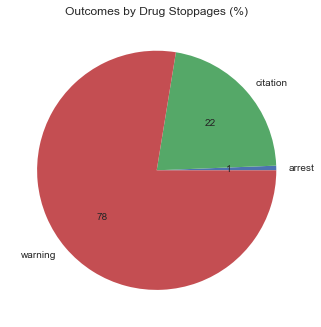

In [251]:
print(tn.groupby('outcome')['contraband_drugs'].sum())
tn.groupby('outcome')['contraband_drugs'].sum().plot(kind= 'pie', ylabel = '', title = 'Outcomes by Drug Stoppages (%)', autopct='%.f')
plt.show()

# Conclusions for Hypthesis Q6
# - On average overall vehicle searches experienced a decline from 2010 to 2016
# - Relative to overall searches, there was an increase in drug stoppages within the same period (2010 - 2016).
# - However, when vehicles were stopped, and drugs were found, the most likely outcome was a warning

# Final Conclusions
# - On average, the proportion of traffic violations and stop outcomes for male and female respectively is identically.
# - Relative to females, male drivers are more likely to be frisked, if their vehicles are stopped
# - There is a sharp increase in the overall arrest rate overnight, relative to early morning hours
        # - this increase could be attributed to their being an active entertainment nightlife within Nashville (e.g. live country music)
# - From 2010 to 2015, there was a decline in overall searches of vehicles
        #- However; there was an increase in vehicles being searched, if drugs were found